In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

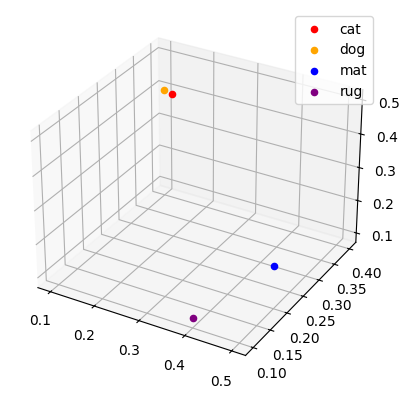

In [5]:
cat = [0.2, 0.3, 0.5]
dog = [0.1, 0.4, 0.4]
mat = [0.5, 0.2, 0.2]
rug = [0.4, 0.1, 0.1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cat[0], cat[1], cat[2], c='r', label='cat')
ax.scatter(dog[0], dog[1], dog[2], c='orange', label='dog')
ax.scatter(mat[0], mat[1], mat[2], c='b', label='mat')
ax.scatter(rug[0], rug[1], rug[2], c='purple', label='rug')
plt.legend()

In [6]:
sentence = "The cat sat on the mat"

vec_layer = tf.keras.layers.TextVectorization(
    max_tokens=100,
    output_mode="int",
    split="whitespace",
    standardize="lower_and_strip_punctuation",
    output_sequence_length=8,
)
vec_layer.adapt([sentence])

print(vec_layer.get_vocabulary())

['', '[UNK]', np.str_('the'), np.str_('sat'), np.str_('on'), np.str_('mat'), np.str_('cat')]


In [7]:
# Process the sentence with the vectorization layer
print(vec_layer([sentence]))

# Now try a new sentence
new_sentence = "The dog sat on the rug"
print(vec_layer([new_sentence]))

tf.Tensor([[2 6 3 4 2 5 0 0]], shape=(1, 8), dtype=int64)
tf.Tensor([[2 1 3 4 2 1 0 0]], shape=(1, 8), dtype=int64)


C:\Users\ccurtis\AppData\Local\Temp\ipykernel_7564\2876092405.py:3: RuntimeWarning: divide by zero encountered in divide
  z_scaled = z / T
C:\Users\ccurtis\AppData\Local\Temp\ipykernel_7564\2876092405.py:4: RuntimeWarning: invalid value encountered in divide
  return np.exp(z_scaled) / np.exp(z_scaled).sum()


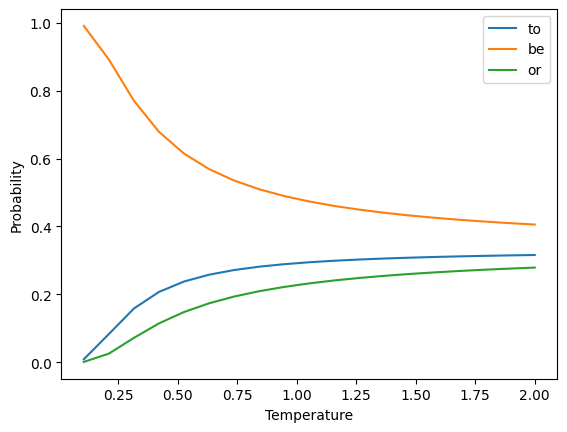

In [8]:
# Softmax plus temperature
def softmax_temp(z: np.ndarray, T: float):
    z_scaled = z / T
    return np.exp(z_scaled) / np.exp(z_scaled).sum()

logits = np.array([2.5, 3.0, 2.25])
temp = np.linspace(0, 2, 20)
probs = np.array([softmax_temp(logits, t) for t in temp])
plt.plot(temp, probs)
plt.xlabel("Temperature")
plt.ylabel("Probability")
plt.legend(["to", "be", "or"])